In [1]:
SIZE_TEST = 50000

N_EPOCHS = 25
CACHED = True

In [2]:
import sys
sys.path.append('../src')

In [3]:
import numpy as np

# Creates Dataset

In [4]:
# Creates Nietzsche dataset
import dataset

data_obj = dataset.Nietzsche()
data_obj.create(size_test=SIZE_TEST)

Using TensorFlow backend.


('corpus length:', 600901)
('total chars:', 59)
('nb sequences:', 600861)
Vectorization...
('nb sequences:', 49960)
Vectorization...


In [5]:
print data_obj.train['X'].shape
print data_obj.train['y'].shape
print len(data_obj.train_raw)
print ''
print data_obj.test['X'].shape
print data_obj.test['y'].shape
print len(data_obj.test_raw)

(600861, 40, 59)
(600861, 59)
600901

(49960, 40, 59)
(49960, 59)
50000


# Creates and trains character model

In [6]:
import model
reload(model)

nn_model = model.LSTM128(data_obj, 128, n_epochs=1)
nn_model.build()

if CACHED:
    nn_model.load_from_file('../models/Nietzsche_Aug16')
else:
    for i in range(N_EPOCHS):
        nn_model.train()
        nn_model.save('../models/Nietzsche_' + str(i))

In [7]:
# from keras.optimizers import RMSprop

# nn_model.model.compile(loss='categorical_crossentropy',
#                            optimizer=RMSprop(lr=0.01),
#                            metrics=['acc'])
# nn_model.train()

Epoch 1/1
600861/600861 [==============================] - 1254s - loss: 1.5131 - acc: 0.5563  


In [8]:
# Creates a sentence
reload(model)
nn_model.complete_sentence(250)

Dimensions: (1, 40, 59)
[42 44 31 32 27 29 31  0  0  0 45 47 42 42 41 45 35 40 33  1 46 34 27 46  1
 46 44 47 46 34  1 35 45  1 27  1 49 41 39 27 40  9  0  0  0 31 31 31  1 45
 35 33 33  1 41 32  1 31 48 31 40  1 41 40 31  1 42 35 31 29 31  1 51 41 47
  1 44 31 31 46 49 35 38 38 35 40 33  1 35 39 42 41 45 35 46 35 41 40  7  1
 34 31  1 27 44 31  1 40 41 46  1 27 29 29 41 44 30  1 46 41  1 35 40 45 41
 38 31 30  0 47 42 35 45 46 41 40 45 46  0 35 46  1 41 32  1 46 34 31  1 47
 34 27 46 47 27 44 51  8  8 35 46  1 35 45  0 41 40 38 51  1 34 41 49  1 27
 32 46 31 40 46 38 51  1 34 27 48 31  1 28 41 30 51  1 42 41 49 31 44 32 47
 38 38 31 45 45  1 39 27 40 51  1 34 27 45  1 46 34 31  1  1 46 34 44 41 47
 33 34  0 27 38 38  1 30 41 39 27 40 29 31  1 41 32  1 39 31 27 40 45  1 41
 32  1 31 50 27 39 42 38 31  7  1 27 45  1  3 31 44 44 41 44  1 41 32  1 45
 47 28 36 31 29 46  1 31 32 32 31 29 46  1 35]


'preface\n\n\nsupposing that truth is a woman.\n\n\neee sigg of even one piece you reetwilling imposition, he are not accord to insoled\nupistonst\nit of the uhatuary--it is\nonly how aftently have body powerfulless many has the  through\nall domance of means of example, as "error of subject effect i'

# Extracts States

In [9]:
# Gets hidden states
states = nn_model.extract_states()
print states.shape

(50000, 128)


# Computes Features

In [10]:
import features
reload(features)
features_obj = features.WordsOccurChar(data_obj)
features_obj.build_feature_functions()
computed_features = features_obj.compute_feat_matrix()

computed_features

Building shingles length: 2
2-shingles: ['th', ' t', 'e ', ' a', 'he', 's ', 'in', 't ', 'er', ' o', ' i', 'an', ', ', 're', 'd ', 'n ', 'on', 'at', 'nd', ' s', 'is', ' w', 'it', 'en', 'f ', 'of', 'ti', 'es', 'y ', 'st', 'hi', 'ha', 'se', 'al', 'o ', 'to', 'or', 'ou', ' p', 'ng', 'r ', 've', 'as', 'nt', ' h', ' b', 'te', ' m', 'io', 'll', 'ic', 'ed', ' f', 'ar', ' c', 'el', 'wh', 'ce', 'us', 'de', 'be', 'ns', ' e', 'ne', 'le', 'co', 'me', 'l ', 'ly', 'il', 'ho', 'h ', 'so', 'ch', 'ea', ' d', 'g ', 'wi', 'pe', 'a ', 'no', 'ma', 'si', 'li', 'ra', ' n', 'ut', 'ri', 'ur', 'ta', 'lo', 'nc', 'di', ' r', 'mo', 'ph', 'om', 'ct', 'os', 'ot']
Building shingles length: 3
3-shingles: [' th', 'the', 'he ', ' of', 'of ', 'and', ' an', 'nd ', 'to ', ' in', 'ing', ' to', 'is ', 'at ', 'in ', 'ion', ' wh', 'hat', 'her', 'ng ', ' be', 'tio', 'as ', ' is', 'thi', ' it', 'tha', 're ', ' a ', 'ent', 'on ', 'ly ', 's a', ', a', 't t', 'ed ', 'f t', 's t', ' wi', 'er ', ' ha', 'ere', ' as', 'e o', 'it ', 'e 

{'feat_matrix': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0]]),
 'labels': ['all_sep',
  'stop-!',
  'stop- ',
  'stop-"',
  "stop-'",
  'stop-)',
  'stop-(',
  'stop-\n',
  'stop--',
  'stop-,',
  'stop-.',
  'stop-_',
  'stop-;',
  'stop-:',
  'stop-?',
  'char-a',
  'char-b',
  'char-c',
  'char-d',
  'char-e',
  'char-f',
  'char-g',
  'char-h',
  'char-i',
  'char-j',
  'char-k',
  'char-l',
  'char-m',
  'char-n',
  'char-o',
  'char-p',
  'char-q',
  'char-r',
  'char-s',
  'char-t',
  'char-u',
  'char-v',
  'char-w',
  'char-x',
  'char-y',
  'char-z',
  'range-()',
  'range-"',
  'caps',
  'w-the',
  'w-of',
  'w-and',
  'w-to',
  'w-in',
  'w-is',
  'w-a',
  'w-that',
  'w-it',
  'w-as',
  'w-which',
  'w-be',
  'w-this',
  'w-for',
  'w-not',
  'w-will',
  'w-all',
  'w-with',
  'w-has',
  'w-an',
  'w-at',
  'w

# Computes and Plots Scores

In [16]:
import score
reload(score)
score_obj = score.CorrelationScore(states, computed_features['feat_matrix'])
score_obj.compute_scores()

Scoring feature 0 out of 344
Scoring feature 10 out of 344
Scoring feature 20 out of 344
Scoring feature 30 out of 344
Scoring feature 40 out of 344
Scoring feature 50 out of 344
Scoring feature 60 out of 344
Scoring feature 70 out of 344
Scoring feature 80 out of 344
Scoring feature 90 out of 344
Scoring feature 100 out of 344
Scoring feature 110 out of 344
Scoring feature 120 out of 344
Scoring feature 130 out of 344
Scoring feature 140 out of 344
Scoring feature 150 out of 344
Scoring feature 160 out of 344
Scoring feature 170 out of 344
Scoring feature 180 out of 344
Scoring feature 190 out of 344
Scoring feature 200 out of 344
Scoring feature 210 out of 344
Scoring feature 220 out of 344
Scoring feature 230 out of 344
Scoring feature 240 out of 344
Scoring feature 250 out of 344
Scoring feature 260 out of 344
Scoring feature 270 out of 344
Scoring feature 280 out of 344
Scoring feature 290 out of 344
Scoring feature 300 out of 344
Scoring feature 310 out of 344
Scoring feature 320

Filtering feature matrix


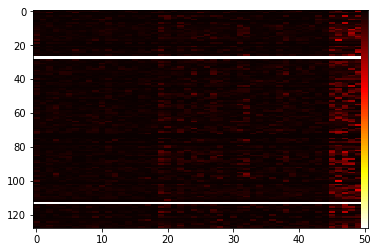

['all_sep', 'stop-!', 'stop- ', 'stop-"', "stop-'", 'stop-)', 'stop-(', 'stop-\n', 'stop--', 'stop-,', 'stop-.', 'stop-_', 'stop-;', 'stop-:', 'stop-?', 'char-a', 'char-b', 'char-c', 'char-d', 'char-e', 'char-f', 'char-g', 'char-h', 'char-i', 'char-j', 'char-k', 'char-l', 'char-m', 'char-n', 'char-o', 'char-p', 'char-q', 'char-r', 'char-s', 'char-t', 'char-u', 'char-v', 'char-w', 'char-x', 'char-y', 'char-z', 'range-()', 'range-"', 'caps', 'w-the', 'w-of', 'w-and', 'w-to', 'w-in', 'w-is']


In [17]:
%matplotlib inline

N_FEATURES_TO_PLOT = 50

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import os
import numpy as np

to_plot = score_obj.filter_scores(N_FEATURES_TO_PLOT)

n_values   = to_plot.shape[0]
dummy_vals = np.linspace(0,1,num=n_values)
dummy_vals = np.expand_dims(dummy_vals, axis=1)
to_plot  = np.append(to_plot, dummy_vals, axis = 1)

plt.imshow(to_plot, cmap='hot',
                      norm=Normalize(vmin=0),
                      interpolation='nearest',
                      aspect='auto')
plt.show()
#plt.savefig('correlation_matrix.pdf',  bbox_inches='tight')

print computed_features['labels'][:N_FEATURES_TO_PLOT]

Filtering feature matrix


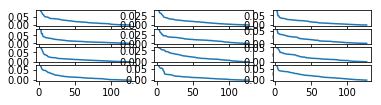

In [18]:
# Second viz
to_plot = score_obj.filter_scores(N_FEATURES_TO_PLOT)

if to_plot.shape[1] <= 4:
    ncol = 1
elif 4 < to_plot.shape[1] <= 8:
    ncol = 2
else:
    nplots = min(12, to_plot.shape[1])
    to_plot = to_plot[:,:nplots]
    ncol = 3

for i in range(to_plot.shape[1]):
    neuron_series = np.sort(to_plot[:,i])[::-1]
    plt.subplot(to_plot.shape[1],ncol,i+1)
    plt.plot(neuron_series)

plt.show()
#plt.savefig('individual_correlation_scores.pdf',  bbox_inches='tight')

# More complex feature score - multineuron

In [19]:
reload(score)

score_obj = score.MultiNeuronPred(states, 
                computed_features['feat_matrix'],
                computed_features['labels'])
score_obj.compute_scores()


Scoring feature 0 out of 344
Feature: all_sep
Fitting model
Computing score
Accuracy: 0.999703176017
Feature: stop-!
Fitting model
Computing score
Accuracy: 1.0
Feature: stop- 
Fitting model
Computing score
Accuracy: 0.999731939418
Feature: stop-"
Fitting model
Computing score
Accuracy: 0.992175273865
Feature: stop-'
Fitting model
Computing score
Accuracy: 0.986666666667
Feature: stop-)
Fitting model
Computing score
Accuracy: 0.966666666667
Feature: stop-(
Fitting model
Computing score
Accuracy: 0.966666666667
Feature: stop-

Fitting model
Computing score
Accuracy: 0.996138996139
Feature: stop--
Fitting model
Computing score
Accuracy: 0.998556998557
Feature: stop-,
Fitting model
Computing score
Accuracy: 1.0
Scoring feature 10 out of 344
Feature: stop-.
Fitting model
Computing score
Accuracy: 1.0
Feature: stop-_
Fitting model
Computing score
Accuracy: 0.722222222222
Feature: stop-;
Fitting model
Computing score
Accuracy: 1.0
Feature: stop-:
Fitting model
Computing score
Accuracy: 1.0
F

Accuracy: 0.0191637886805
Feature: w-than
Fitting model
Computing score
Accuracy: 0.0112540472649
Feature: w-philosophers
Fitting model
Computing score
Accuracy: 0.0199955101593
Feature: w-really
Fitting model
Computing score
Accuracy: 0.0143544963902
Feature: w-something
Fitting model
Computing score
Accuracy: 0.0108905927831
Feature: w-being
Fitting model
Computing score
Accuracy: 0.0124141565025
Feature: w-far
Fitting model
Computing score
Accuracy: 0.0135294979566
Scoring feature 120 out of 344
Feature: w-also
Fitting model
Computing score
Accuracy: 0.0103278810446
Feature: w-let
Fitting model
Computing score
Accuracy: 0.01032277542
Feature: w-means
Fitting model
Computing score
Accuracy: 0.00963716585833
Feature: w-however
Fitting model
Computing score
Accuracy: 0.0143852373353
Feature: w-new
Fitting model
Computing score
Accuracy: 0.0121161520005
Feature: w-time
Fitting model
Computing score
Accuracy: 0.0124314182717
Feature: w-no
Fitting model
Computing score
Accuracy: 0.1109257

Accuracy: 0.110925727719
Feature: s2-ma
Fitting model
Computing score
Accuracy: 0.162457479505
Feature: s2-si
Fitting model
Computing score
Accuracy: 0.106932765524
Feature: s2-li
Fitting model
Computing score
Accuracy: 0.128855342928
Feature: s2-ra
Fitting model
Computing score
Accuracy: 0.120156202132
Feature: s2- n
Fitting model
Computing score
Accuracy: 0.036688485994
Scoring feature 230 out of 344
Feature: s2-ut
Fitting model
Computing score
Accuracy: 0.12266085238
Feature: s2-ri
Fitting model
Computing score
Accuracy: 0.114898236237
Feature: s2-ur
Fitting model
Computing score
Accuracy: 0.173247895051
Feature: s2-ta
Fitting model
Computing score
Accuracy: 0.0848494284051
Feature: s2-lo
Fitting model
Computing score
Accuracy: 0.11658732623
Feature: s2-nc
Fitting model
Computing score
Accuracy: 0.140184582484
Feature: s2-di
Fitting model
Computing score
Accuracy: 0.125342270965
Feature: s2- r
Fitting model
Computing score
Accuracy: 0.0325766480472
Feature: s2-mo
Fitting model
Compu

Accuracy: 0.0740589141588
Feature: s3-per
Fitting model
Computing score
Accuracy: 0.0631378108707
Feature: s3-e, 
Fitting model
Computing score
Accuracy: 0.0970913543835
Feature: s3- ma
Fitting model
Computing score
Accuracy: 0.0333423384622
Feature: s3-ich
Fitting model
Computing score
Accuracy: 0.0715392894485
Feature: s3-sti
Fitting model
Computing score
Accuracy: 0.0482271789091
Scoring feature 340 out of 344
Feature: s3-whi
Fitting model
Computing score
Accuracy: 0.0761623114001
Feature: s3-al 
Fitting model
Computing score
Accuracy: 0.0304397101222
Feature: s3- so
Fitting model
Computing score
Accuracy: 0.0266396737905
Feature: s3-ter
Fitting model
Computing score
Accuracy: 0.042883285298


In [20]:
score_obj.filter_scores(50).shape

Filtering feature matrix


(128, 50)

Filtering feature matrix


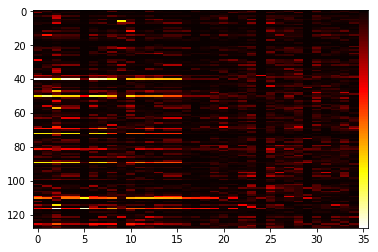

0 all_sep
1 stop-!
2 stop- 
3 stop-"
4 stop-'
5 stop-)
6 stop-(
7 stop-

8 stop--
9 stop-,
10 stop-.
11 stop-_
12 stop-;
13 stop-:
14 stop-?
15 char-a
16 char-b
17 char-c
18 char-d
19 char-e
20 char-f
21 char-g
22 char-h
23 char-i
24 char-j
25 char-k
26 char-l
27 char-m
28 char-n
29 char-o
30 char-p
31 char-q
32 char-r
33 char-s
34 char-t


In [21]:
%matplotlib inline

N_FEATURES_TO_PLOT = 35

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import os
import numpy as np

to_plot = score_obj.filter_scores(N_FEATURES_TO_PLOT)

n_values   = to_plot.shape[0]
dummy_vals = np.linspace(0,np.max(to_plot),num=n_values)
dummy_vals = np.expand_dims(dummy_vals, axis=1)
to_plot  = np.append(to_plot, dummy_vals, axis = 1)

plt.imshow(to_plot, cmap='hot',
                      norm=Normalize(vmin=0),
                      interpolation='nearest',
                      aspect='auto')
plt.show()
#plt.savefig('correlation_matrix.pdf',  bbox_inches='tight')

for i,l in enumerate(computed_features['labels'][:N_FEATURES_TO_PLOT]):
    print i,l

Filtering feature matrix


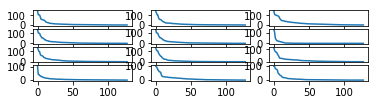

In [22]:
# Second viz
to_plot = score_obj.filter_scores(N_FEATURES_TO_PLOT)

if to_plot.shape[1] <= 4:
    ncol = 1
elif 4 < to_plot.shape[1] <= 8:
    ncol = 2
else:
    nplots = min(12, to_plot.shape[1])
    to_plot = to_plot[:,:nplots]
    ncol = 3

for i in range(to_plot.shape[1]):
    neuron_series = np.sort(to_plot[:,i])[::-1]
    plt.subplot(to_plot.shape[1],ncol,i+1)
    plt.plot(neuron_series)

plt.show()
#plt.savefig('individual_correlation_scores.pdf',  bbox_inches='tight')

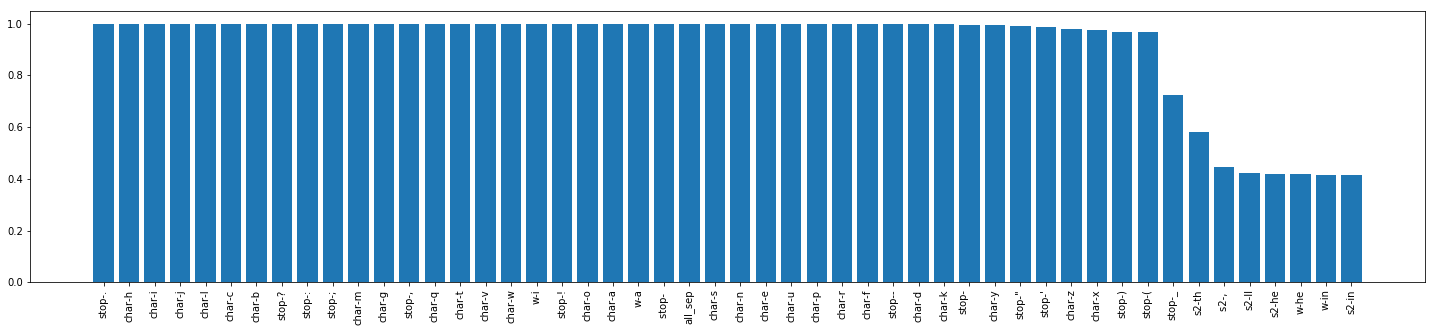

In [23]:
# Third viz: shows score per rule
fig_size = [25,5]
plt.rcParams["figure.figsize"] = fig_size

feat_scores = score_obj.model_scores
feat_names =  computed_features['labels']

dorder = np.argsort(feat_scores)[::-1][:50]

scores = np.array(feat_scores)[dorder]
names = np.array(feat_names)[dorder]

fig, ax = plt.subplots()
plt.bar(np.arange(dorder.shape[0]), scores)
plt.xticks(np.arange(dorder.shape[0]), names, rotation='vertical')

plt.show()
# print feat_names[order]

In [24]:
gt_50 = np.array(feat_scores) > .5
np.array(feat_names)[gt_50]

array(['all_sep', 'stop-!', 'stop- ', 'stop-"', "stop-'", 'stop-)',
       'stop-(', 'stop-\n', 'stop--', 'stop-,', 'stop-.', 'stop-_',
       'stop-;', 'stop-:', 'stop-?', 'char-a', 'char-b', 'char-c',
       'char-d', 'char-e', 'char-f', 'char-g', 'char-h', 'char-i',
       'char-j', 'char-k', 'char-l', 'char-m', 'char-n', 'char-o',
       'char-p', 'char-q', 'char-r', 'char-s', 'char-t', 'char-u',
       'char-v', 'char-w', 'char-x', 'char-y', 'char-z', 'w-a', 'w-i',
       's2-th'],
      dtype='|S14')

# Plots feature groups

In [25]:
from numpy.core.defchararray import startswith

feat_scores = np.array(score_obj.model_scores)
feat_names =  np.array(computed_features['labels'])

def print_scores(name, MAX_PRINT=10):
    indices = np.where(startswith(feat_names, name))[0]
    for f_i in indices[:MAX_PRINT]:
        print feat_names[f_i], feat_scores[f_i] 
    print 'AVERAGE:', feat_scores[indices].mean()

# Stop words feature
print '** Stop words feature:'
print_scores('stop-')

# Character feature
print '\n** Character features:'
print_scores('char-')

# 2-char sequences
print '\n** 2-character features:'
print_scores('s2-')

# 3-char sequences
print '\n** 3-character features:'
print_scores('s3-')

# Whole word feature
print '\n** Word:'
print_scores('w-')

# Caps letters feature
print '\n** Caps feature:'
print_scores('caps')


** Stop words feature:
stop-! 1.0
stop-  0.999731939418
stop-" 0.992175273865
stop-' 0.986666666667
stop-) 0.966666666667
stop-( 0.966666666667
stop-
0.996138996139
stop-- 0.998556998557
stop-, 1.0
stop-. 1.0
AVERAGE: 0.973487530729

** Character features:
char-a 0.999833082958
char-b 1.0
char-c 1.0
char-d 0.997732426304
char-e 0.999581239531
char-f 0.999004975124
char-g 1.0
char-h 1.0
char-i 1.0
char-j 1.0
AVERAGE: 0.997698510505

** 2-character features:
s2-th 0.58204267916
s2- t 0.224145651275
s2-e  0.222751329561
s2- a 0.307641503938
s2-he 0.418122649296
s2-s  0.248416977214
s2-in 0.416413327913
s2-t  0.148678041801
s2-er 0.33767872314
s2- o 0.138979419368
AVERAGE: 0.177110994075

** 3-character features:
s3- th 0.33171871279
s3-the 0.354312360761
s3-he  0.100400120813
s3- of 0.175837515452
s3-of  0.173243673413
s3-and 0.24623913164
s3- an 0.0689443519435
s3-nd  0.108107116124
s3-to  0.0553682283233
s3- in 0.0827765461284
AVERAGE: 0.0666847245584

** Word:
w-the 0.354312360761
w-of

In [35]:
%load_ext rpy2.ipython


SyntaxError: invalid syntax (<ipython-input-35-3ced7cea0962>, line 2)

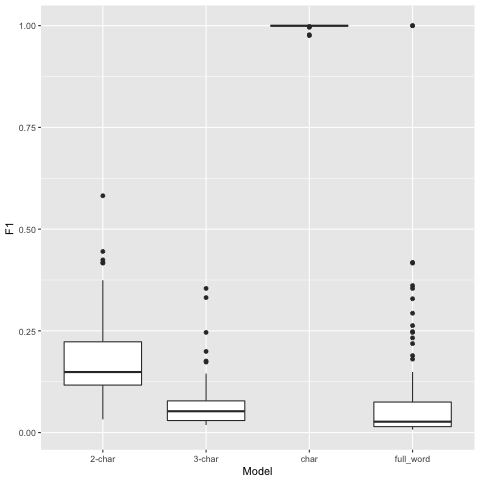

In [67]:
%%R  -i feat_scores,feat_names
library(dplyr)
library(ggplot2)

to_plot <- data.frame(F1 = feat_scores, feature = feat_names)

to_plot[['Model']] <- gsub('-.*', '', to_plot[['feature']])
to_plot[['Model']][to_plot[['Model']]=='w'] <- 'full_word'
to_plot[['Model']][to_plot[['Model']]=='s1'] <- '1-char'
to_plot[['Model']][to_plot[['Model']]=='s2'] <- '2-char'
to_plot[['Model']][to_plot[['Model']]=='s3'] <- '3-char'

to_plot[['Word']] <- gsub('.*-', '', to_plot[['feature']])

to_plot <- to_plot %>% filter(Model %in% c('char', '2-char','3-char','full_word'))

ggplot(to_plot, aes(x=Model, y=F1)) + geom_boxplot()